#### import library

In [129]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [244]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
# survived is the target feature 

In [245]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [246]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [247]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [248]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [249]:
ds = pd.concat([train, test],sort=False)

In [250]:
ds['LastName'] = ds['Name'].str.split(',', expand=True)[0]

In [251]:
sur = []
died = []
for index, row in ds.iterrows():
    s = ds[(ds['LastName']==row['LastName']) & (ds['Survived']==1)]
    d = ds[(ds['LastName']==row['LastName']) & (ds['Survived']==0)]
    s=len(s)
    if row['Survived'] == 1:
        s-=1
    d=len(d)
    if row['Survived'] == 0:
        d-=1
    sur.append(s)
    died.append(d)
ds['FamilySurvived'] = sur
ds['FamilyDied'] = died

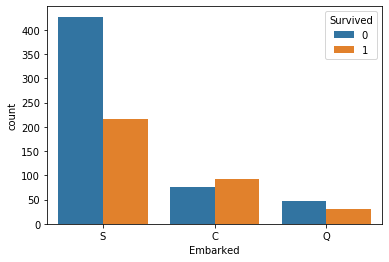

In [252]:
sns.countplot('Embarked',hue ='Survived', data=train)

In [253]:
ds['Embarked'] = ds['Embarked'].fillna('S')

In [254]:
ds['Fare'] = ds['Fare'].fillna(train['Fare'].median())

# Mapping Fare
ds.loc[(ds['Fare'] <= 7), 'Fare'] = 0
ds.loc[(ds['Fare'] > 7) & (ds['Fare'] <= 12), 'Fare'] = 1
ds.loc[(ds['Fare'] > 12) & (ds['Fare'] <= 18), 'Fare']   = 2
ds.loc[(ds['Fare'] > 18) & (ds['Fare'] <= 24), 'Fare']   = 3
ds.loc[(ds['Fare'] > 24) & (ds['Fare'] <= 30), 'Fare']   = 4
ds.loc[(ds['Fare'] > 30) & (ds['Fare'] <= 36), 'Fare']   = 5
ds.loc[(ds['Fare'] > 36) & (ds['Fare'] <= 42), 'Fare']   = 6
ds.loc[(ds['Fare'] > 42) & (ds['Fare'] <= 48), 'Fare']   = 7
ds.loc[(ds['Fare'] > 48) & (ds['Fare'] <= 54), 'Fare']   = 8
ds.loc[(ds['Fare'] > 54), 'Fare'] = 9
ds['Fare'] = ds['Fare'].astype(int)

In [255]:
age_avg = ds['Age'].mean()
age_std = ds['Age'].std()
age_null_count = ds['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

In [256]:
ds.loc[np.isnan(ds['Age']),'Age'] = age_null_random_list
ds.loc[:,'Age'] = ds['Age'].astype(int)

# Mapping Age
ds.loc[ ds['Age'] <= 8, 'Age'] = 0
ds.loc[(ds['Age'] > 8) & (ds['Age'] <= 16), 'Age'] = 1
ds.loc[(ds['Age'] > 16) & (ds['Age'] <= 32), 'Age'] = 2
ds.loc[(ds['Age'] > 32) & (ds['Age'] <= 40), 'Age'] = 3
ds.loc[(ds['Age'] > 40) & (ds['Age'] <= 48), 'Age'] = 4
ds.loc[(ds['Age'] > 48) & (ds['Age'] <= 56), 'Age'] = 5
ds.loc[(ds['Age'] > 56) & (ds['Age'] <= 64), 'Age'] = 6
ds.loc[ ds['Age'] > 64, 'Age'] = 7

In [257]:
ds.loc[:,'Cabin'] = pd.Series([1 if not pd.isnull(i) else 0 for i in ds['Cabin']]) 

In [258]:
ds.loc[:,'rich_woman'] = 0
ds.loc[:,'men_3'] = 0

ds.loc[(ds['Pclass']<=2) & (ds['Sex']=='female'), 'rich_woman'] = 1
ds.loc[(ds['Pclass']==3) & (ds['Sex']=='male'), 'men_3'] = 1

In [259]:
ds['FamilySize'] = ds['SibSp'] + ds['Parch'] + 1
ds['IsAlone'] = 0
ds.loc[ds['FamilySize'] == 1, 'IsAlone'] = 1

In [260]:
# Mapping FamilySize
ds.loc[ ds['FamilySize'] <= 2, 'FamilySize'] = 0
ds.loc[(ds['FamilySize'] > 2) & (ds['FamilySize'] <= 4), 'FamilySize'] = 1
ds.loc[(ds['FamilySize'] > 4) & (ds['FamilySize'] <= 6), 'FamilySize'] = 2
ds.loc[(ds['FamilySize'] > 6) & (ds['FamilySize'] <= 8), 'FamilySize'] = 3
ds.loc[ ds['FamilySize'] > 8, 'FamilySize'] = 4

In [261]:
categorical = ['SibSp','Parch','Pclass', 'Sex', 'Embarked', 'Age', 'Fare','FamilySize','FamilySurvived','FamilyDied']
for cat in categorical:
    ds = pd.concat([ds, pd.get_dummies(ds[cat], prefix=cat)], axis=1)
    ds = ds.drop([cat], axis=1)

In [262]:
ds = ds.drop(['PassengerId', 'Ticket', 'LastName','Name','Sex_male'], axis=1)

In [263]:
train = ds[ds['Survived'].notnull()]
test = ds[ds['Survived'].isnull()]
test = test.drop(['Survived'], axis=1)

In [264]:
train.head()

,Survived,Cabin,rich_woman,men_3,IsAlone,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,FamilySurvived_3,FamilySurvived_4,FamilyDied_0,FamilyDied_1,FamilyDied_2,FamilyDied_3,FamilyDied_4,FamilyDied_5,FamilyDied_6,FamilyDied_7
0,0.0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [265]:
test.head()

,Cabin,rich_woman,men_3,IsAlone,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,FamilySurvived_3,FamilySurvived_4,FamilyDied_0,FamilyDied_1,FamilyDied_2,FamilyDied_3,FamilyDied_4,FamilyDied_5,FamilyDied_6,FamilyDied_7
0,0,0,1,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [266]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [267]:
submit_test = np.array(test) 

# KNN

In [289]:
class KNearestNeighbor(object):
    def __init__(self):
        pass
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X, k=1):
        dists = self.compute_distances(X)
        return self.predict_labels(dists, k=k)
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt(np.sum(X**2, axis=1).reshape(num_test, 1) + np.sum(self.X_train**2, axis=1) - 2 * X.dot(self.X_train.T))
        return dists
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            top_k_indx = np.argsort(dists[i])[:k]
            closest_y = self.y_train[top_k_indx]
            vote = Counter(closest_y)
            count = vote.most_common()
            y_pred[i] = count[0][0]
        return y_pred

In [290]:
classifier = KNearestNeighbor()

In [291]:
classifier.train(np.array(train.iloc[:800,1:]), np.array(train.iloc[:800,0]))

In [292]:
dists = classifier.compute_distances(np.array(train.iloc[800:,1:]))

In [302]:
y_test_pred = classifier.predict_labels(dists, k=20)

In [303]:
num_test = np.array(train.iloc[800:,0]).shape[0]
num_correct = np.sum(y_test_pred == np.array(train.iloc[800:,0]))
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 76 / 91 correct => accuracy: 0.835165


In [304]:
classifier_submit = KNearestNeighbor()

In [305]:
classifier.train(np.array(train.iloc[:,1:]), np.array(train.iloc[:,0]))

In [306]:
dists = classifier.compute_distances(submit_test)

In [307]:
y_submit_pred = classifier.predict_labels(dists, k=20)

In [308]:
passengerid = pd.read_csv('gender_submission.csv')

In [309]:
y_submit = pd.DataFrame(data=y_submit_pred, columns=['Survived'])

In [310]:
df = [passengerid['PassengerId'], y_submit]
result = pd.concat(df,axis=1)
result.to_csv('submisson_knn.csv', index=False)

# Logistic Regression

In [352]:
class LogisticRegression(object):
    def __init__(self):
        pass
    def train(self,X,y):
        self.X_train = X
        self.y_train = y
    def sigmoid(self,z):
        s = 1/(1+np.exp(-z))
        return s
    def initilialize_with_zeros(self,dim):
        w = np.zeros((dim,1))
        b = 0
        return w,b
    def propagate(self,w,b):
        # Forward Propagation
        m = self.X_train.shape[1]
        A = self.sigmoid(np.dot(w.T,self.X_train.T) + b)
        cost = (-1/m)*(np.sum(self.y_train*np.log(A) + (1-self.y_train)*np.log(1-A)))
        
        # Backward Propagation
        dw = 1/m*(np.dot(self.X_train.T, (A-self.y_train).T))
        db = 1/m*np.sum(A-self.y_train)
        
        grads = {'dw':dw, 'db':db}
        return grads, cost
    def optimize(self,w,b,num_iter, learning_rate, print_cost=False):
        costs = []
        for i in range(num_iter):
            grads, cost = self.propagate(w,b)
            dw = grads['dw']
            db = grads['db']
            
            w = w - dw * learning_rate
            b = b - db * learning_rate
            
            if i % 100 == 0:
                costs.append(cost)
            if print_cost and i % 100 == 0:
                print('Cost after iteration %i: %f' %(i,cost))
            
        params = {'w':w,'b':b}
        grads = {'dw':dw,'db':db}
        
        return params, grads, costs
    def predict(self,w,b,X):
        m = X.shape[0]
        Y_prediction = np.zeros((1,m))
        w = w.reshape(X.shape[1],1)
        
        A = self.sigmoid(np.dot(w.T,X.T)+b)
        
        for i in range(A.shape[1]):
            if A[0,i] > 0.5:
                Y_prediction[0,i] = 1
            else:
                Y_prediction[0,i] = 0
            
        return Y_prediction
    
    def model(self, X_test = None, y_test = None, num_iterations = 100000, learning_rate = 0.005, print_cost = False):
        w, b = self.initilialize_with_zeros(self.X_train.shape[1])
        parameters, grads, costs = self.optimize(w, b, num_iterations, learning_rate, print_cost)
        w = parameters["w"]
        b = parameters["b"]
        Y_prediction_test = self.predict(w, b, X_test)
        Y_prediction_train = self.predict(w, b, self.X_train)
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - self.y_train)) * 100))
        if y_test is not None:
            print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
        
        d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}
        
        return d

In [353]:
classifier = LogisticRegression()

In [354]:
classifier.train(np.array(train.iloc[:800,1:]), np.array(train.iloc[:800,0]))

In [355]:
d = classifier.model(np.array(train.iloc[800:,1:]), np.array(train.iloc[800:,0]),print_cost = True)

Cost after iteration 0: 8.943835
Cost after iteration 100: 6.454850
Cost after iteration 200: 5.962060
Cost after iteration 300: 5.722433
Cost after iteration 400: 5.576478
Cost after iteration 500: 5.477175
Cost after iteration 600: 5.404419
Cost after iteration 700: 5.348150
Cost after iteration 800: 5.302843
Cost after iteration 900: 5.265237
Cost after iteration 1000: 5.233290
Cost after iteration 1100: 5.205654
Cost after iteration 1200: 5.181401
Cost after iteration 1300: 5.159867
Cost after iteration 1400: 5.140563
Cost after iteration 1500: 5.123119
Cost after iteration 1600: 5.107248
Cost after iteration 1700: 5.092724
Cost after iteration 1800: 5.079366
Cost after iteration 1900: 5.067025
Cost after iteration 2000: 5.055579
Cost after iteration 2100: 5.044926
Cost after iteration 2200: 5.034981
Cost after iteration 2300: 5.025669
Cost after iteration 2400: 5.016929
Cost after iteration 2500: 5.008705
Cost after iteration 2600: 5.000951
Cost after iteration 2700: 4.993625
Cost

Cost after iteration 45200: 4.719543
Cost after iteration 45300: 4.719466
Cost after iteration 45400: 4.719390
Cost after iteration 45500: 4.719314
Cost after iteration 45600: 4.719238
Cost after iteration 45700: 4.719162
Cost after iteration 45800: 4.719087
Cost after iteration 45900: 4.719012
Cost after iteration 46000: 4.718937
Cost after iteration 46100: 4.718863
Cost after iteration 46200: 4.718789
Cost after iteration 46300: 4.718715
Cost after iteration 46400: 4.718642
Cost after iteration 46500: 4.718569
Cost after iteration 46600: 4.718496
Cost after iteration 46700: 4.718423
Cost after iteration 46800: 4.718351
Cost after iteration 46900: 4.718279
Cost after iteration 47000: 4.718208
Cost after iteration 47100: 4.718137
Cost after iteration 47200: 4.718066
Cost after iteration 47300: 4.717995
Cost after iteration 47400: 4.717925
Cost after iteration 47500: 4.717855
Cost after iteration 47600: 4.717785
Cost after iteration 47700: 4.717715
Cost after iteration 47800: 4.717646
C

Cost after iteration 68000: 4.707872
Cost after iteration 68100: 4.707838
Cost after iteration 68200: 4.707804
Cost after iteration 68300: 4.707771
Cost after iteration 68400: 4.707738
Cost after iteration 68500: 4.707704
Cost after iteration 68600: 4.707671
Cost after iteration 68700: 4.707638
Cost after iteration 68800: 4.707605
Cost after iteration 68900: 4.707573
Cost after iteration 69000: 4.707540
Cost after iteration 69100: 4.707507
Cost after iteration 69200: 4.707475
Cost after iteration 69300: 4.707442
Cost after iteration 69400: 4.707410
Cost after iteration 69500: 4.707378
Cost after iteration 69600: 4.707345
Cost after iteration 69700: 4.707313
Cost after iteration 69800: 4.707282
Cost after iteration 69900: 4.707250
Cost after iteration 70000: 4.707218
Cost after iteration 70100: 4.707186
Cost after iteration 70200: 4.707155
Cost after iteration 70300: 4.707123
Cost after iteration 70400: 4.707092
Cost after iteration 70500: 4.707061
Cost after iteration 70600: 4.707029
C

Cost after iteration 90500: 4.702253
Cost after iteration 90600: 4.702235
Cost after iteration 90700: 4.702216
Cost after iteration 90800: 4.702198
Cost after iteration 90900: 4.702180
Cost after iteration 91000: 4.702161
Cost after iteration 91100: 4.702143
Cost after iteration 91200: 4.702125
Cost after iteration 91300: 4.702107
Cost after iteration 91400: 4.702089
Cost after iteration 91500: 4.702071
Cost after iteration 91600: 4.702053
Cost after iteration 91700: 4.702035
Cost after iteration 91800: 4.702017
Cost after iteration 91900: 4.701999
Cost after iteration 92000: 4.701981
Cost after iteration 92100: 4.701964
Cost after iteration 92200: 4.701946
Cost after iteration 92300: 4.701928
Cost after iteration 92400: 4.701910
Cost after iteration 92500: 4.701893
Cost after iteration 92600: 4.701875
Cost after iteration 92700: 4.701858
Cost after iteration 92800: 4.701840
Cost after iteration 92900: 4.701823
Cost after iteration 93000: 4.701805
Cost after iteration 93100: 4.701788
C

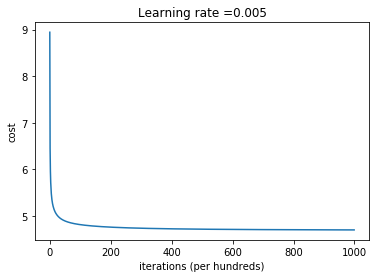

In [356]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [357]:
classifier_submission = LogisticRegression()

In [358]:
classifier.train(np.array(train.iloc[:,1:]), np.array(train.iloc[:,0]))

In [359]:
d = classifier.model(submit_test, print_cost = True)

Cost after iteration 0: 9.961196
Cost after iteration 100: 7.053477
Cost after iteration 200: 6.536502
Cost after iteration 300: 6.286829
Cost after iteration 400: 6.134177
Cost after iteration 500: 6.029385
Cost after iteration 600: 5.951707
Cost after iteration 700: 5.890896
Cost after iteration 800: 5.841366
Cost after iteration 900: 5.799829
Cost after iteration 1000: 5.764221
Cost after iteration 1100: 5.733177
Cost after iteration 1200: 5.705747
Cost after iteration 1300: 5.681250
Cost after iteration 1400: 5.659179
Cost after iteration 1500: 5.639149
Cost after iteration 1600: 5.620858
Cost after iteration 1700: 5.604066
Cost after iteration 1800: 5.588580
Cost after iteration 1900: 5.574239
Cost after iteration 2000: 5.560911
Cost after iteration 2100: 5.548484
Cost after iteration 2200: 5.536865
Cost after iteration 2300: 5.525971
Cost after iteration 2400: 5.515733
Cost after iteration 2500: 5.506089
Cost after iteration 2600: 5.496987
Cost after iteration 2700: 5.488379
Cost

Cost after iteration 22800: 5.187599
Cost after iteration 22900: 5.187229
Cost after iteration 23000: 5.186862
Cost after iteration 23100: 5.186497
Cost after iteration 23200: 5.186134
Cost after iteration 23300: 5.185774
Cost after iteration 23400: 5.185416
Cost after iteration 23500: 5.185061
Cost after iteration 23600: 5.184708
Cost after iteration 23700: 5.184357
Cost after iteration 23800: 5.184009
Cost after iteration 23900: 5.183663
Cost after iteration 24000: 5.183320
Cost after iteration 24100: 5.182978
Cost after iteration 24200: 5.182639
Cost after iteration 24300: 5.182302
Cost after iteration 24400: 5.181968
Cost after iteration 24500: 5.181635
Cost after iteration 24600: 5.181305
Cost after iteration 24700: 5.180977
Cost after iteration 24800: 5.180651
Cost after iteration 24900: 5.180327
Cost after iteration 25000: 5.180005
Cost after iteration 25100: 5.179686
Cost after iteration 25200: 5.179368
Cost after iteration 25300: 5.179052
Cost after iteration 25400: 5.178739
C

Cost after iteration 45100: 5.141945
Cost after iteration 45200: 5.141838
Cost after iteration 45300: 5.141730
Cost after iteration 45400: 5.141624
Cost after iteration 45500: 5.141517
Cost after iteration 45600: 5.141412
Cost after iteration 45700: 5.141306
Cost after iteration 45800: 5.141201
Cost after iteration 45900: 5.141097
Cost after iteration 46000: 5.140993
Cost after iteration 46100: 5.140890
Cost after iteration 46200: 5.140787
Cost after iteration 46300: 5.140684
Cost after iteration 46400: 5.140582
Cost after iteration 46500: 5.140480
Cost after iteration 46600: 5.140379
Cost after iteration 46700: 5.140278
Cost after iteration 46800: 5.140178
Cost after iteration 46900: 5.140078
Cost after iteration 47000: 5.139979
Cost after iteration 47100: 5.139880
Cost after iteration 47200: 5.139782
Cost after iteration 47300: 5.139683
Cost after iteration 47400: 5.139586
Cost after iteration 47500: 5.139489
Cost after iteration 47600: 5.139392
Cost after iteration 47700: 5.139295
C

Cost after iteration 67800: 5.126011
Cost after iteration 67900: 5.125966
Cost after iteration 68000: 5.125921
Cost after iteration 68100: 5.125877
Cost after iteration 68200: 5.125832
Cost after iteration 68300: 5.125788
Cost after iteration 68400: 5.125744
Cost after iteration 68500: 5.125700
Cost after iteration 68600: 5.125656
Cost after iteration 68700: 5.125613
Cost after iteration 68800: 5.125569
Cost after iteration 68900: 5.125526
Cost after iteration 69000: 5.125483
Cost after iteration 69100: 5.125440
Cost after iteration 69200: 5.125397
Cost after iteration 69300: 5.125354
Cost after iteration 69400: 5.125311
Cost after iteration 69500: 5.125269
Cost after iteration 69600: 5.125226
Cost after iteration 69700: 5.125184
Cost after iteration 69800: 5.125142
Cost after iteration 69900: 5.125100
Cost after iteration 70000: 5.125058
Cost after iteration 70100: 5.125016
Cost after iteration 70200: 5.124975
Cost after iteration 70300: 5.124933
Cost after iteration 70400: 5.124892
C

Cost after iteration 90500: 5.118636
Cost after iteration 90600: 5.118613
Cost after iteration 90700: 5.118589
Cost after iteration 90800: 5.118566
Cost after iteration 90900: 5.118543
Cost after iteration 91000: 5.118520
Cost after iteration 91100: 5.118497
Cost after iteration 91200: 5.118474
Cost after iteration 91300: 5.118451
Cost after iteration 91400: 5.118428
Cost after iteration 91500: 5.118405
Cost after iteration 91600: 5.118383
Cost after iteration 91700: 5.118360
Cost after iteration 91800: 5.118337
Cost after iteration 91900: 5.118315
Cost after iteration 92000: 5.118292
Cost after iteration 92100: 5.118270
Cost after iteration 92200: 5.118247
Cost after iteration 92300: 5.118225
Cost after iteration 92400: 5.118202
Cost after iteration 92500: 5.118180
Cost after iteration 92600: 5.118158
Cost after iteration 92700: 5.118136
Cost after iteration 92800: 5.118114
Cost after iteration 92900: 5.118092
Cost after iteration 93000: 5.118070
Cost after iteration 93100: 5.118048
C

In [360]:
df = [passengerid['PassengerId'], pd.DataFrame(data=d["Y_prediction_test"].T, columns=['Survived'])]
result = pd.concat(df,axis=1)
result.to_csv('submisson_logistic_regression.csv', index=False)

# 1 Hidden Layer Neural Network

In [156]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [157]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 5
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [158]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [159]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [160]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    W1 = parameters['W1']
    W2 = parameters['W2']
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [161]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [162]:
def update_parameters(parameters, grads, learning_rate=1.2):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [163]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [164]:
def predict(parameters, X):
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [361]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

In [362]:
y_train = np.array(y_train).reshape(1,len(y_train))

In [370]:
parameters = nn_model(X_train.T, y_train, 15, num_iterations=15000, print_cost=True)

Cost after iteration 0: 0.692820
Cost after iteration 1000: 0.278737
Cost after iteration 2000: 0.215164
Cost after iteration 3000: 0.179945
Cost after iteration 4000: 0.166677
Cost after iteration 5000: 0.161510
Cost after iteration 6000: 0.158462
Cost after iteration 7000: 0.156479
Cost after iteration 8000: 0.155276
Cost after iteration 9000: 0.154478
Cost after iteration 10000: 0.153905
Cost after iteration 11000: 0.153471
Cost after iteration 12000: 0.153131
Cost after iteration 13000: 0.152858
Cost after iteration 14000: 0.152635


In [371]:
predictions = predict(parameters, submit_test.T)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.3923444976076555


In [372]:
# Print accuracy
predictions = predict(parameters, submit_test.T)
#print ('Accuracy: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T)) / float(y_test.size) * 100) + '%')

In [373]:
predictions

array([[0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 

In [374]:
df = [passengerid['PassengerId'], pd.DataFrame(data=predictions.T, columns=['Survived'])]
result = pd.concat(df,axis=1)
result.to_csv('submisson_nn.csv', index=False)